In [10]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from scipy import stats

In [11]:
#load csv data for scatter plots
scatter_nba = pd.read_csv('scatter.csv')
scatter_nba = scatter_nba.drop('Unnamed: 0',1)
scatter_nba.head()

,season,teamAbbr,star_power,assists/score,win_count,w/l_ratio
0,2012,ATL,1.616554,0.249345,44.0,0.536585
1,2012,BKN,1.812641,0.210144,49.0,0.597561
2,2012,BOS,1.715965,0.235776,41.0,0.506173
3,2012,CHA,1.781563,0.206158,21.0,0.256098
4,2012,CHI,1.657233,0.246574,45.0,0.548780


In [12]:
scatter_ncaa = pd.read_csv('scatter_ncaa.csv')
scatter_ncaa = scatter_ncaa.drop('Unnamed: 0',1)
scatter_ncaa.head()

,season,team_alias,game_id,team_game_score,assists/score,differencestrash,w/l_ratio,star_power,differences,win_count,game_count
0,2013,ALA,1181.838710,66.709677,0.160521,-4.193548,0.387097,2.300645,0.548387,12,31.0
1,2013,ARIZ,1012.447368,72.868421,0.205605,5.815789,0.868421,1.689211,-14.315789,33,38.0
2,2013,ARK,1144.411765,80.088235,0.190729,8.176471,0.647059,1.840294,-9.875000,22,34.0
3,2013,ASU,837.363636,75.333333,0.188473,6.333333,0.636364,2.075152,-6.935484,21,33.0
4,2013,AUB,917.800000,71.533333,0.160726,0.933333,0.466667,2.246667,0.961538,14,30.0


# Star power vs Wins (NBA)

In [13]:
#get axes and linear regression for star power vs wins
win_count = scatter_nba['win_count']
star_power = scatter_nba['star_power']
star_slope, star_int, star_r, star_p, star_std_err = stats.linregress(star_power, win_count)
star_fit = star_slope * win_count + star_int

In [14]:
#get regression values
print(f'Wins = {round(star_int)} + {round(star_slope)} * Star Power')
print(f'r = {star_r}')
print(f'p value = {star_p}')

Wins = -2.0 + 24.0 * Star Power
r = 0.34100174174284015
p value = 2.8089479714643845e-06


<IPython.core.display.Javascript object>


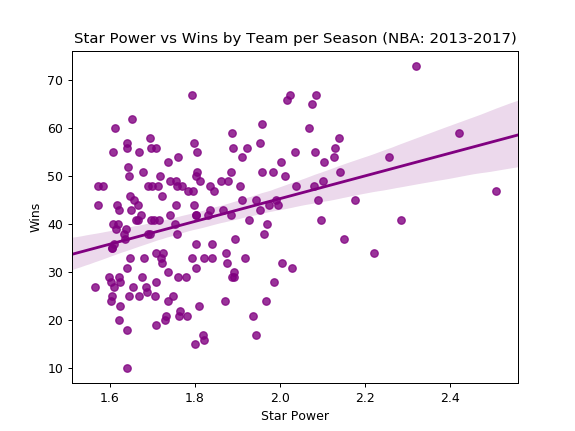

In [16]:
plt.figure()
ax = seaborn.regplot(star_power,win_count, color = 'purple')
ax.set(xlabel='Star Power', ylabel='Wins', title = 'Star Power vs Wins by Team per Season (NBA: 2013-2017)')

plt.savefig('scatter/star_wins_nba.png')
plt.show()

# Assists/Score vs Wins (NBA)

In [17]:
#get axes and linear regression for assists/score vs wins
assists_score = scatter_nba['assists/score']
slope, yint, r, p, std_err = stats.linregress(assists_score, win_count)
fit = slope * win_count + yint

In [18]:
#get regression data
print(f'Wins = {round(yint)} + {round(slope)} * Assists/Score')
print(f'r = {r}')
print(f'p value = {p}')

Wins = 22.0 + 87.0 * Assists/Score
r = 0.1071784224658221
p value = 0.1521266556404782


<IPython.core.display.Javascript object>


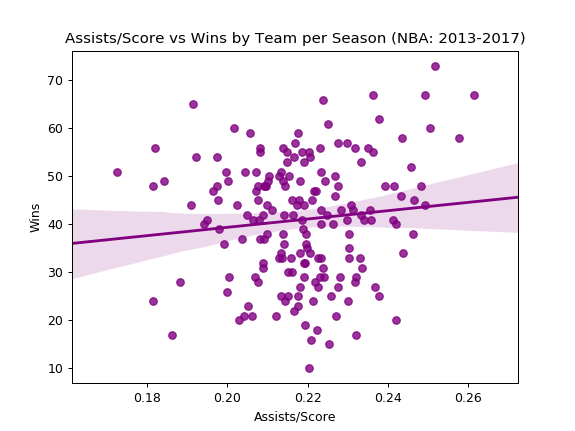

In [20]:
plt.figure()
ax = seaborn.regplot(assists_score,win_count, color = 'purple')
ax.set(xlabel='Assists/Score', ylabel='Wins', title = 'Assists/Score vs Wins by Team per Season (NBA: 2013-2017)')

plt.savefig('scatter/assists_wins_nba.png')
plt.show()

# Star Power vs Assists/Score (NBA)

In [21]:
slope, yint, r, p, std_err = stats.linregress(assists_score, star_power)
fit = slope * star_power + yint

print(f'Star Power = {round(yint)} + {round(slope)} * Assists/Score')
print(f'r = {r}')
print(f'p value = {p}')

Star Power = 3.0 + -3.0 * Assists/Score
r = -0.2913484046768376
p value = 7.246359867360295e-05


<IPython.core.display.Javascript object>


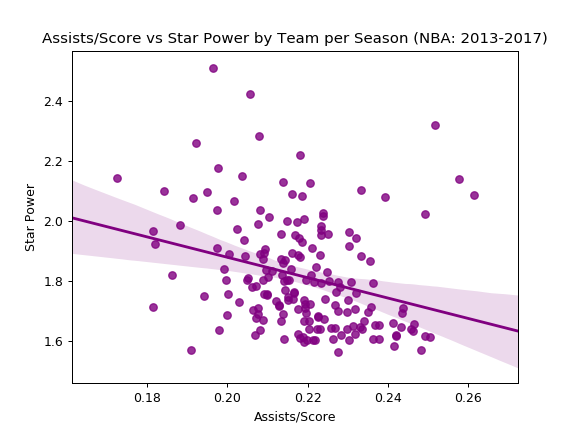

In [24]:
plt.figure()
ax = seaborn.regplot(assists_score,star_power, color = 'purple')
ax.set(xlabel='Assists/Score', ylabel='Star Power', title = 'Assists/Score vs Star Power by Team per Season (NBA: 2013-2017)')

plt.savefig('scatter/assists_star_nba.png')
plt.show()

# Star Power vs Wins (NCAA)

In [25]:
#get axes and linear regression for star power vs wins
win_count = scatter_ncaa['win_count']
star_power = scatter_ncaa['star_power']
slope, yint, r, p, std_err = stats.linregress(star_power, win_count)
fit = slope * win_count + yint

In [26]:
#get regression values
print(f'Wins = {round(yint)} + {round(slope)} * Star Power')
print(f'r = {r}')
print(f'p value = {p}')

Wins = 27.0 + -5.0 * Star Power
r = -0.15945070438768383
p value = 1.956997877671838e-09


<IPython.core.display.Javascript object>


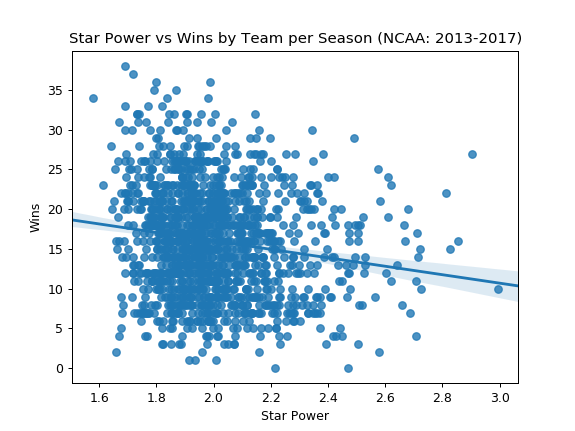

In [27]:
plt.figure()
ax = seaborn.regplot(star_power,win_count)
ax.set(xlabel='Star Power', ylabel='Wins', title = 'Star Power vs Wins by Team per Season (NCAA: 2013-2017)')

plt.savefig('scatter/star_wins_ncaa.png')
plt.show()

# Assists/Score vs Wins (NCAA)

In [28]:
#get axes and linear regression for assists/score vs wins
assists_score = scatter_ncaa['assists/score']
slope, yint, r, p, std_err = stats.linregress(assists_score, win_count)
fit = slope * win_count + yint

In [29]:
#get regression data
print(f'Wins = {round(yint)} + {round(slope)} * Assists/Score')
print(f'r = {r}')
print(f'p value = {p}')

Wins = 0.0 + 86.0 * Assists/Score
r = 0.2522805634385479
p value = 8.81292082544081e-22


<IPython.core.display.Javascript object>


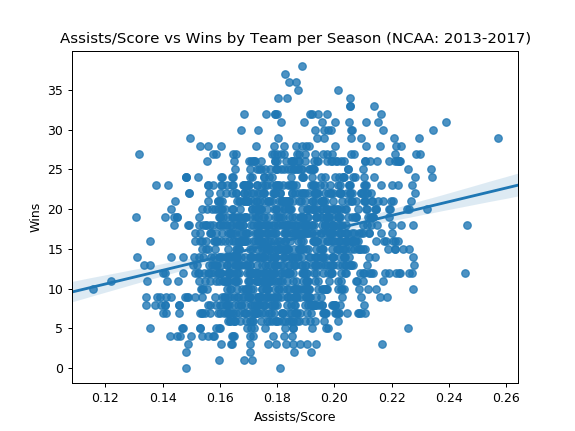

In [30]:
plt.figure()
ax = seaborn.regplot(assists_score,win_count)
ax.set(xlabel='Assists/Score', ylabel='Wins', title = 'Assists/Score vs Wins by Team per Season (NCAA: 2013-2017)')

plt.savefig('scatter/assists_wins_ncaa.png')
plt.show()

# Assists/Score vs Star Power (NCAA)

In [31]:
slope, yint, r, p, std_err = stats.linregress(assists_score, star_power)
fit = slope * star_power + yint

print(f'Star Power = {round(yint)} + {round(slope)} * Assists/Score')
print(f'r = {r}')
print(f'p value = {p}')

Star Power = 2.0 + -2.0 * Assists/Score
r = -0.17667286992770853
p value = 2.749455018010701e-11


<IPython.core.display.Javascript object>


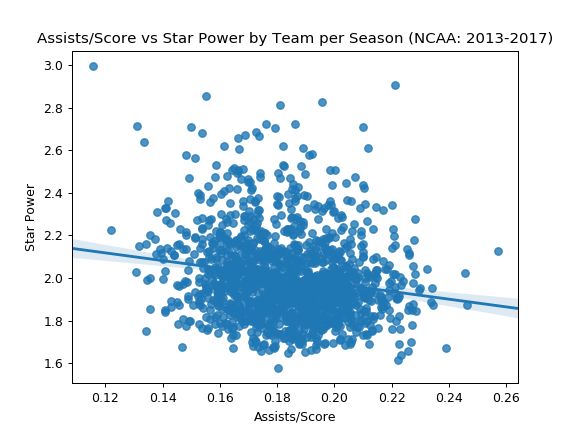

In [32]:
plt.figure()
ax = seaborn.regplot(assists_score,star_power)
ax.set(xlabel='Assists/Score', ylabel='Star Power', title = 'Assists/Score vs Star Power by Team per Season (NCAA: 2013-2017)')

plt.savefig('scatter/assists_star_ncaa.png')
plt.show()